# Tarefa:


### Introdução:
Considere uma cadeia unidimensional composta por N átomos conectados por molas idênticas de constante elástica k . O sistema pode ser de dois tipos:
* Cadeia Ternária: As massas alternam entre m e m2=3m e m3=5m  ao longo da cadeia.
* Cadeia Homogênea: Todas as massas são iguais a m .
Ambos os sistemas devem ser analisados sob condições de contorno com pontas livres (as extremidades da cadeia não estão presas).
 
Parâmetros:
* Massas: m= 1kg , 
* Constante elástica:  k = 1N/m
* Tamanhos da cadeia: N = 100, 1000 e 10.000
 
### Casos
1. Cálculo das Frequências de Vibração
    * Para cada valor de N , calcule as frequências naturais de vibração para:
    * Cadeia ternária(alternância  --m--m2--m3--m--m2--m3-- )
    * Cadeia homogênea (todas as massas iguais)
    * Considere sempre as pontas livres.
2. Densidade de Estados
    * Construa histogramas (densidade de estados) para os valores das frequências em cada caso.
    * Compare os histogramas entre a cadeia binária e a homogênea, para cada tamanho de N .
3. Deslocamentos Relativos (Modos Normais)
    * Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:
    * Às cinco menores frequências (modos de baixa energia)
    * Às cinco maiores frequências (modos de alta energia)
    * Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.
4. Análise e Comparação
    * Analise como a alternância de massas (ternária) e a homogeneidade afetam:
    * A distribuição das frequências (densidade de estados)
    * Os padrões de deslocamento dos modos normais
    * Discuta a presença de possíveis lacunas de frequência (band gaps) e a localização dos modos.

### Orientações para Implementação em Python
* O código deve ser bem documentado e comentado, facilitando o entendimento de cada etapa.
* Utilize bibliotecas como `numpy` e `matplotlib` para cálculos e visualizações.
* Monte a matriz dinâmica do sistema e calcule seus autovalores e autovetores.
* Para grandes valores de N, otimize o código para eficiência computacional.
 
### Instruções para Entrega
* Crie gráficos (histogramas, modos normais, etc.)
* Certifique-se de que cada gráfico esteja devidamente identificado e relacionado a cada caso analisado.

### Sugestão de Estrutura para a resposta
1. Introdução
    * Breve explicação do modelo massa-mola, da diferença entre cadeias homogêneas e binárias, e da relevância das condições de contorno livres.
2. Metodologia
    * Descrição do método numérico utilizado para calcular frequências e modos.
    * Detalhamento da montagem da matriz dinâmica para cadeias binárias e homogêneas.
3. Resultados
    * Histogramas das densidades de estados para cada caso.
    * Gráficos dos deslocamentos relativos para os modos selecionados.
    * Tabela comparativa dos principais resultados.
4. Discussão
    * Interpretação dos efeitos da alternância de massas e das pontas livres.
    * Observações sobre lacunas de frequência, localização de modos e possíveis aplicações.
5. Conclusão
    * Síntese dos principais achados.

#### Instalando pacotes

In [19]:
pip install numpy matplotlib scipy seaborn-whitegrid

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seaborn-whitegrid (from versions: none)
ERROR: No matching distribution found for seaborn-whitegrid


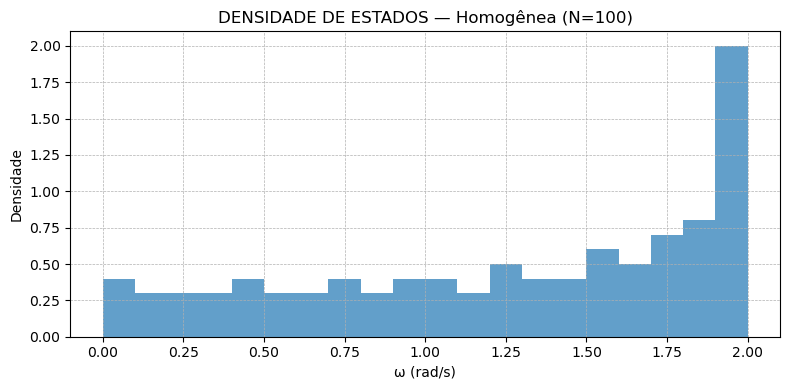

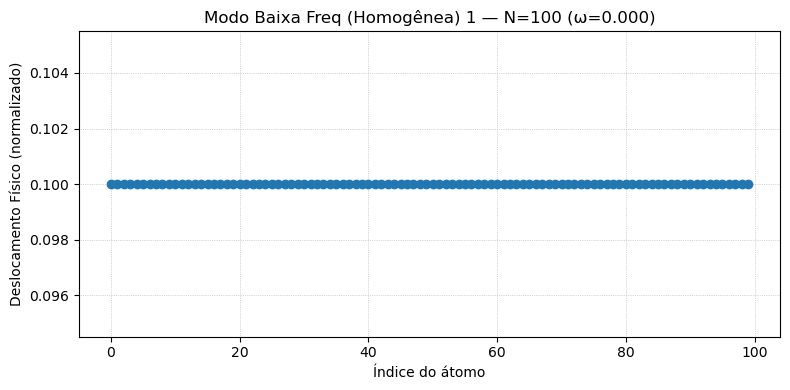

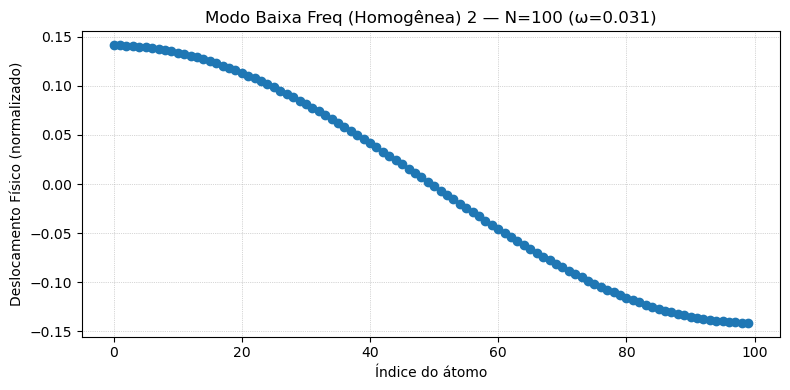

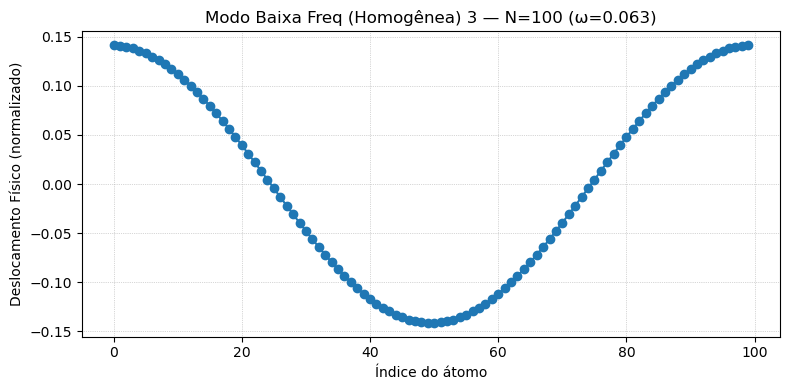

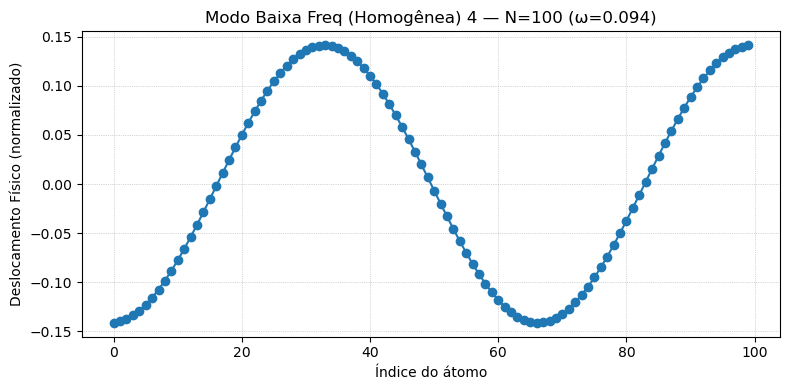

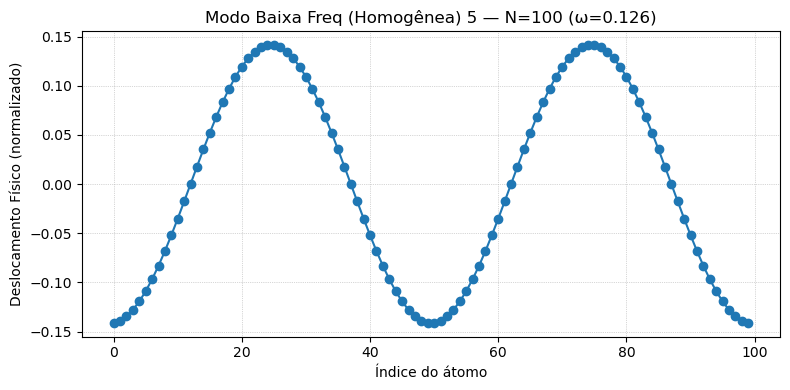

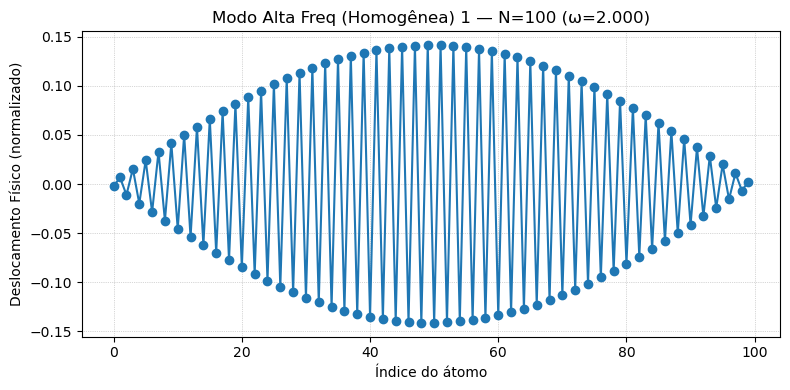

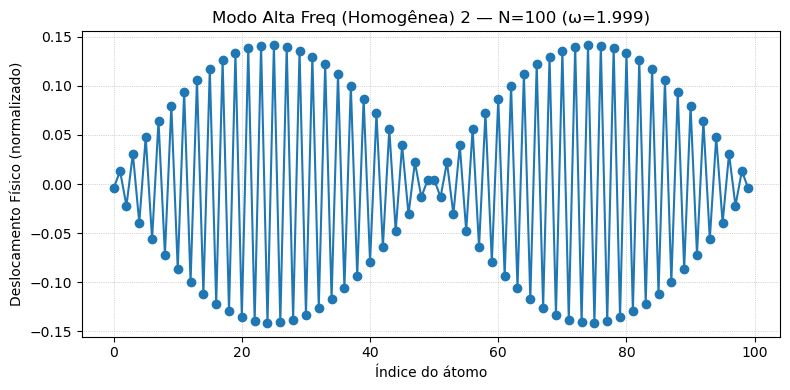

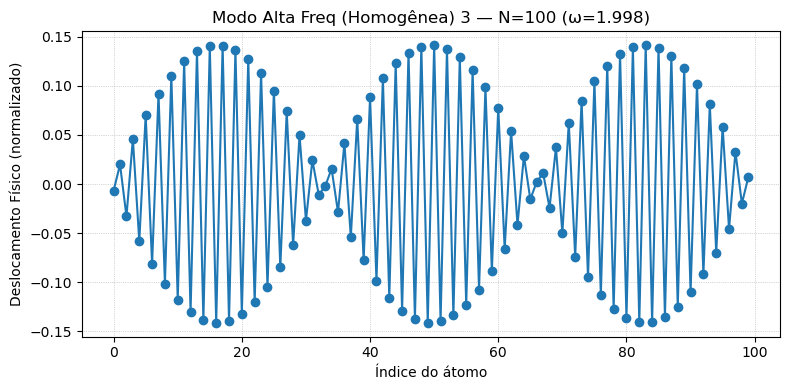

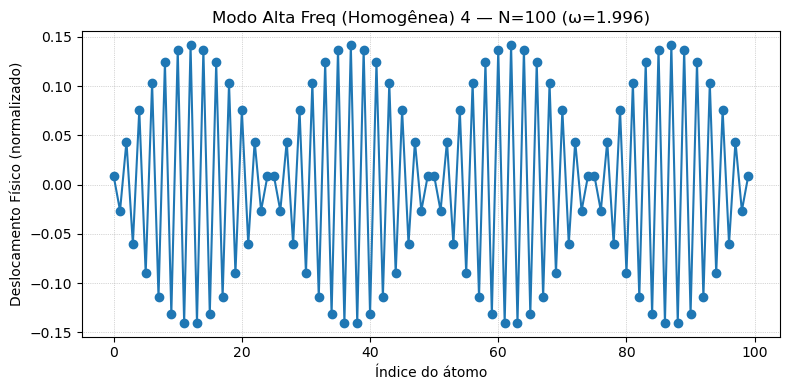

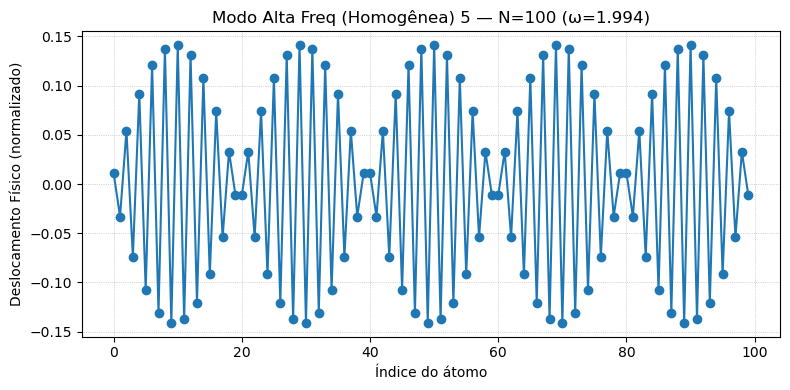

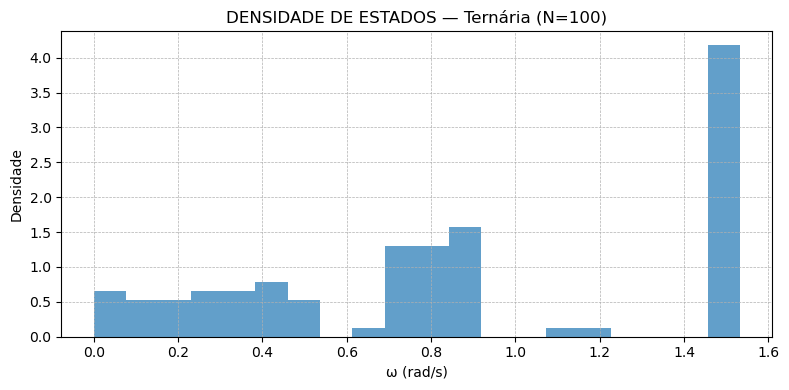

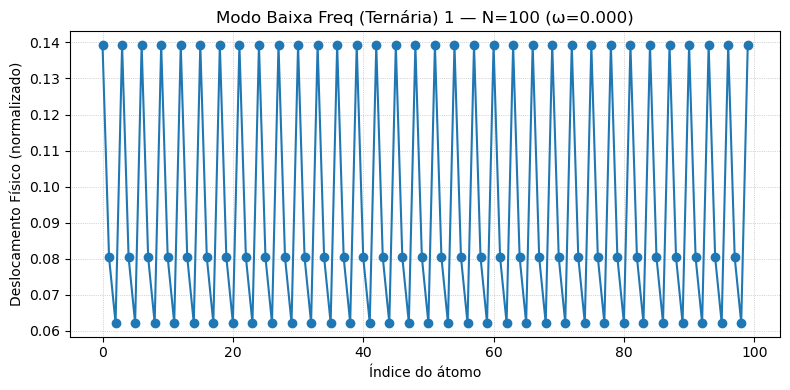

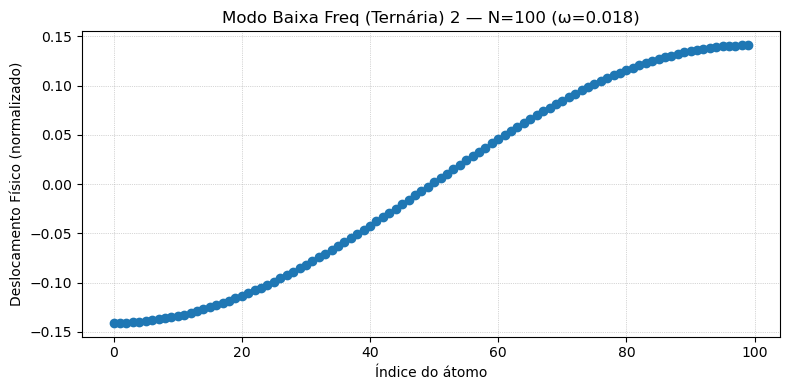

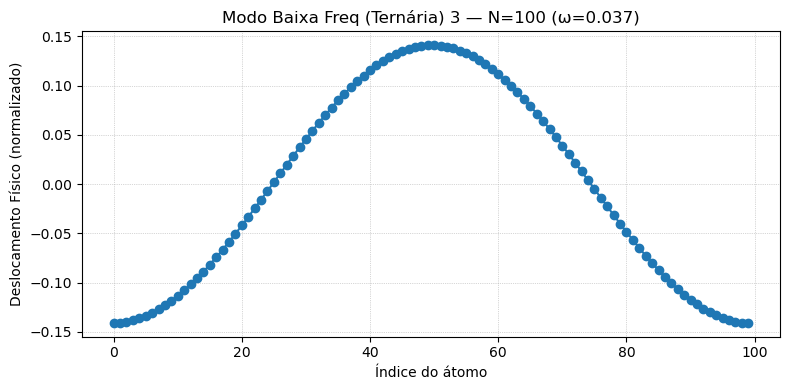

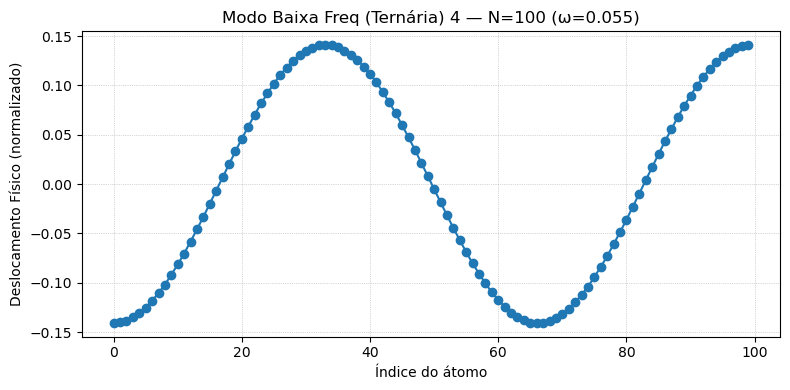

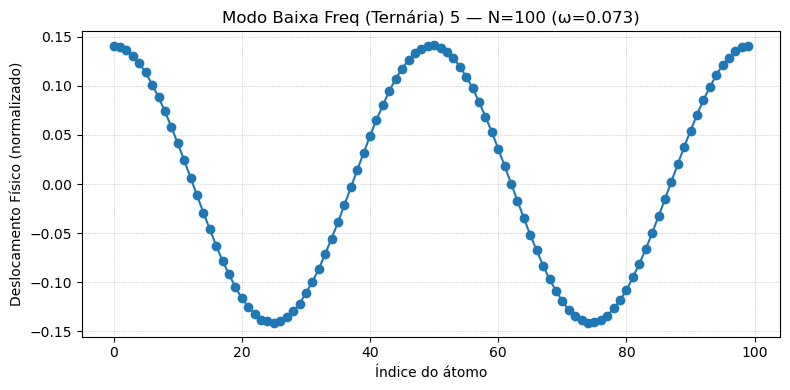

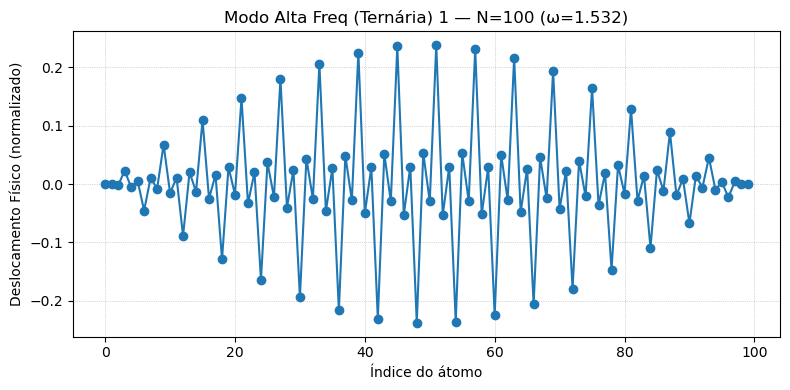

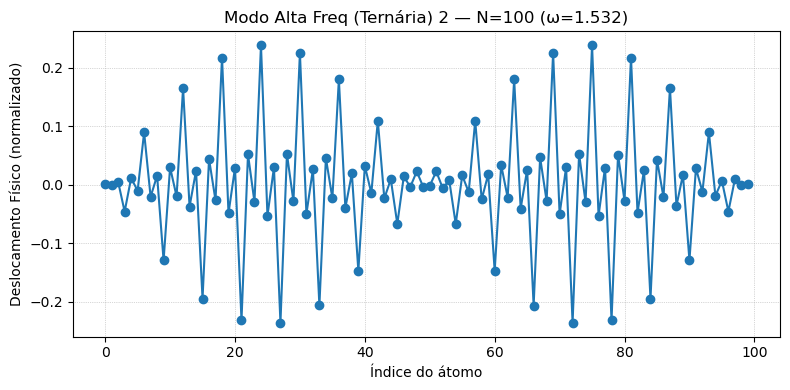

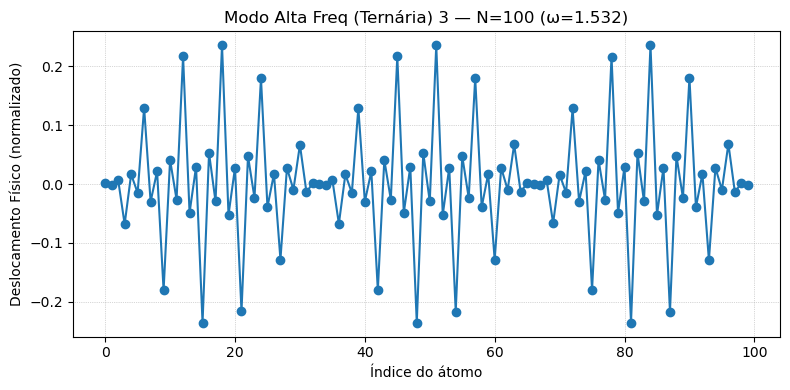

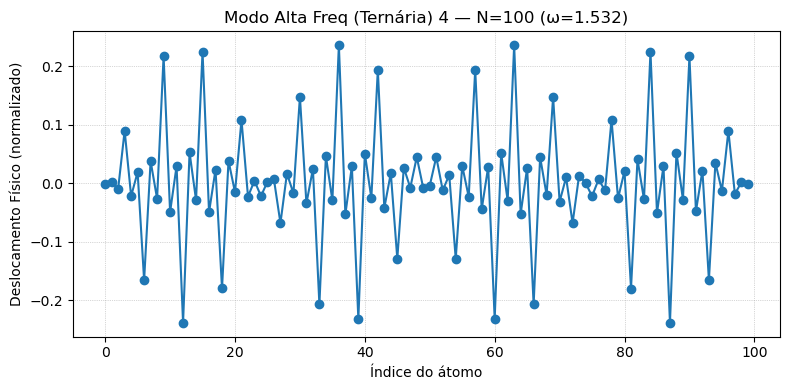

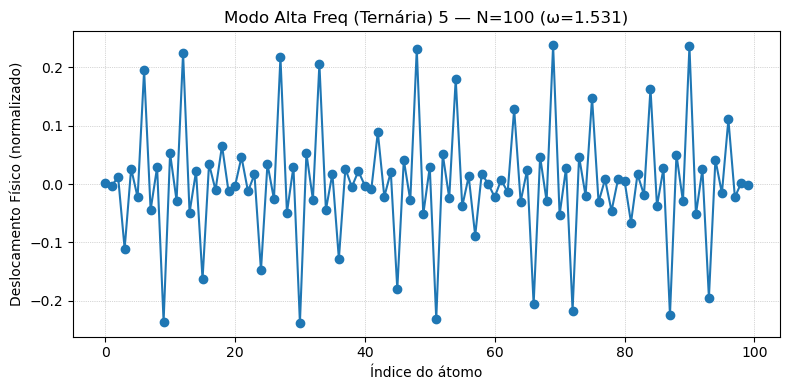

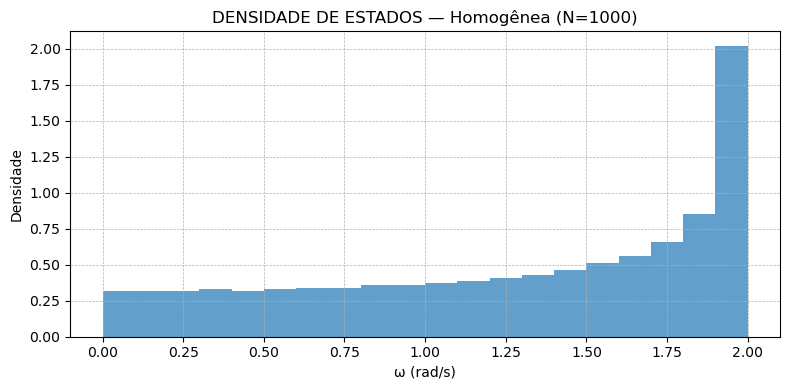

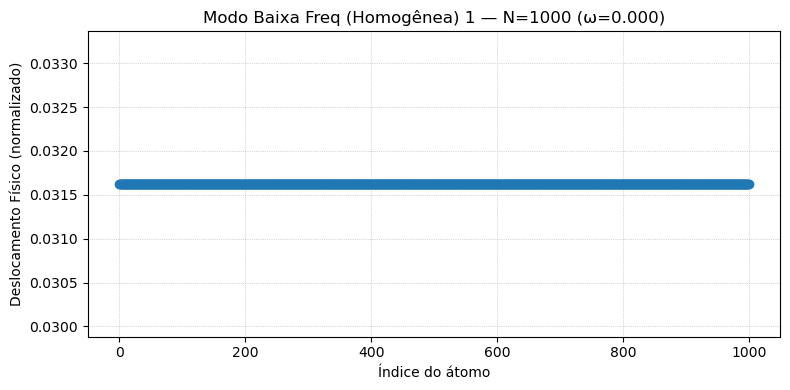

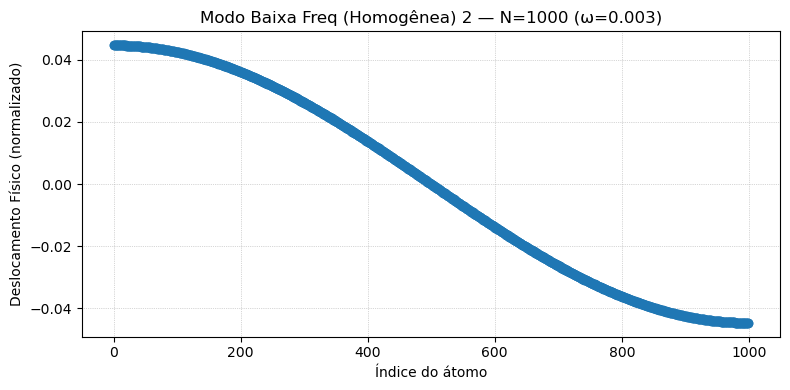

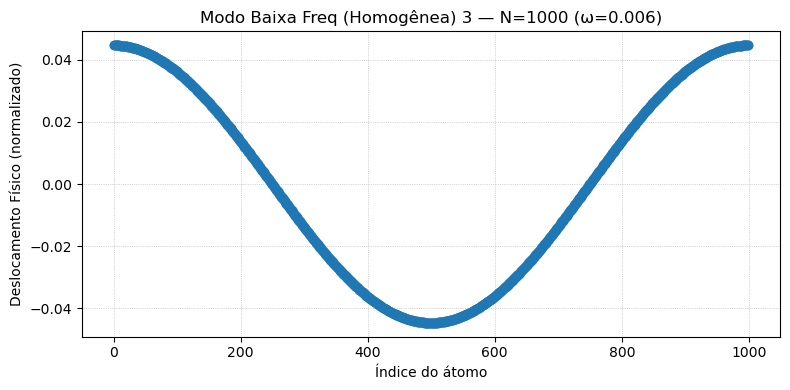

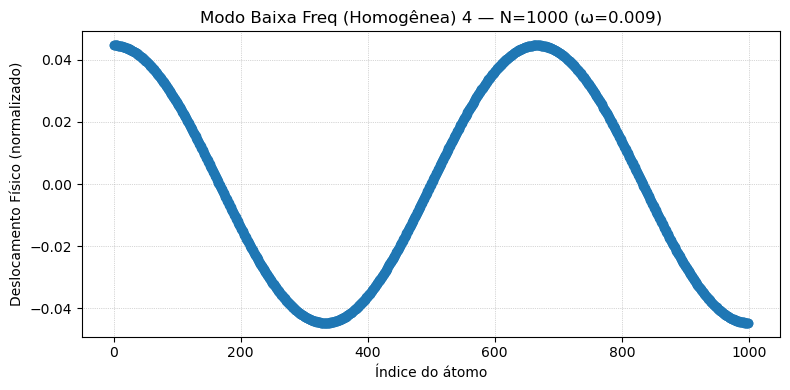

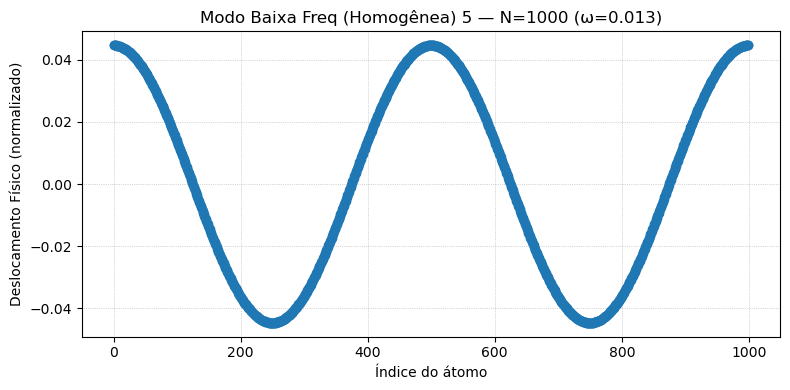

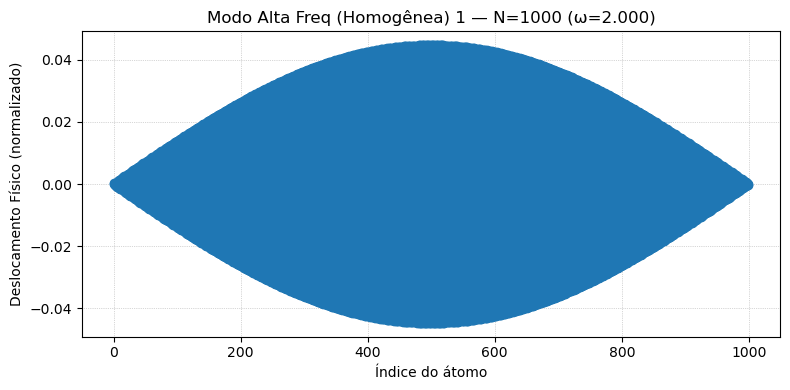

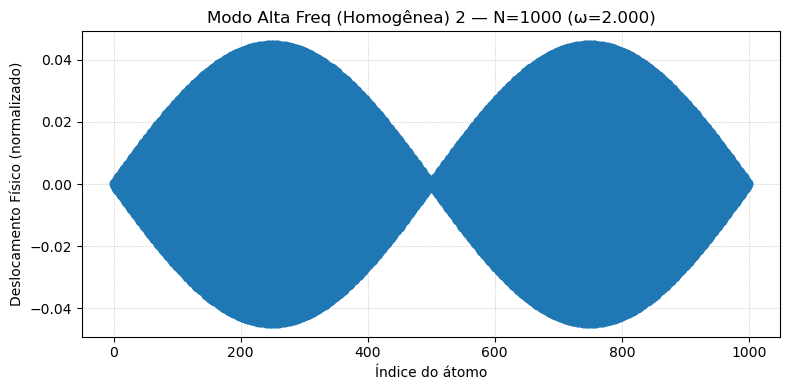

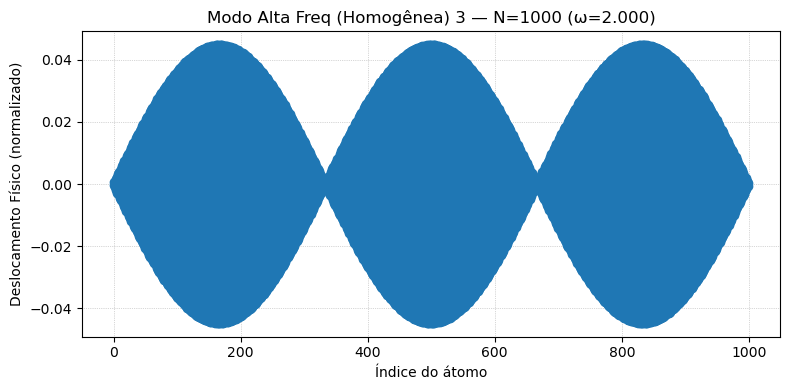

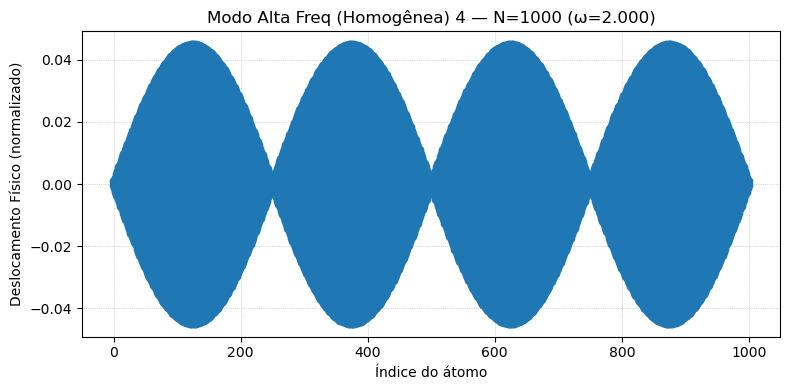

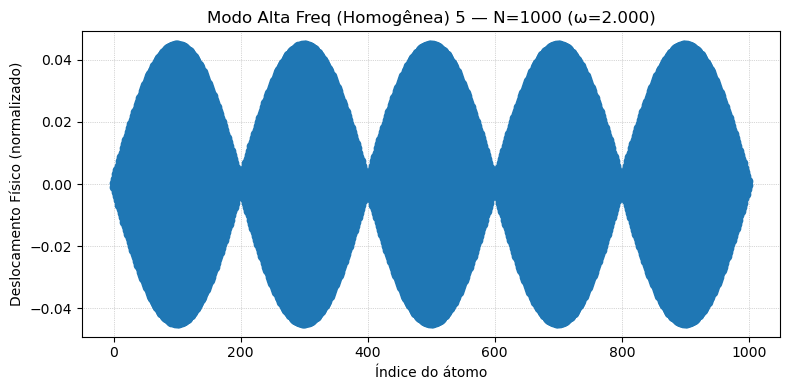

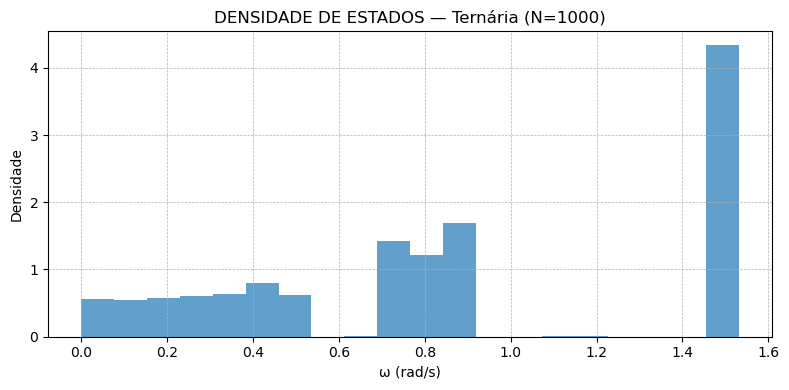

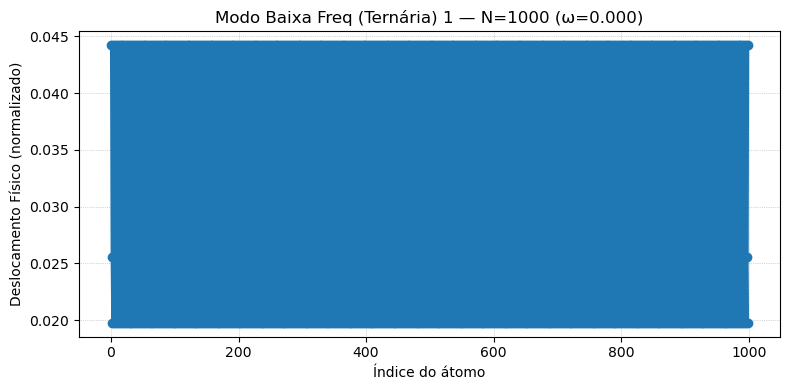

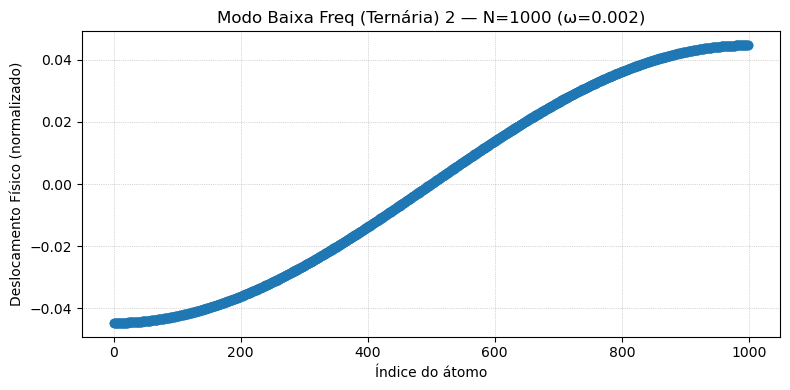

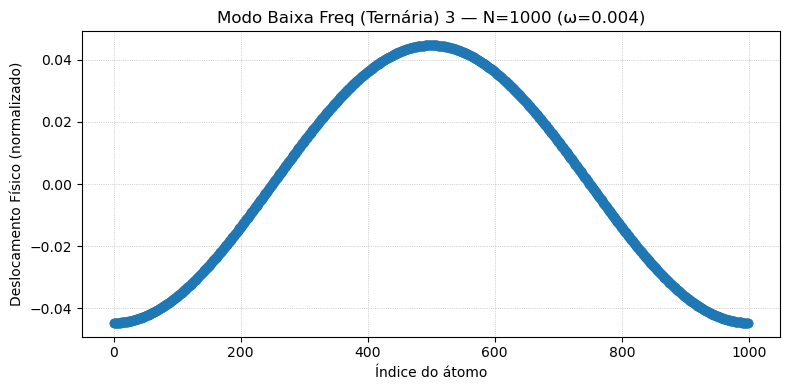

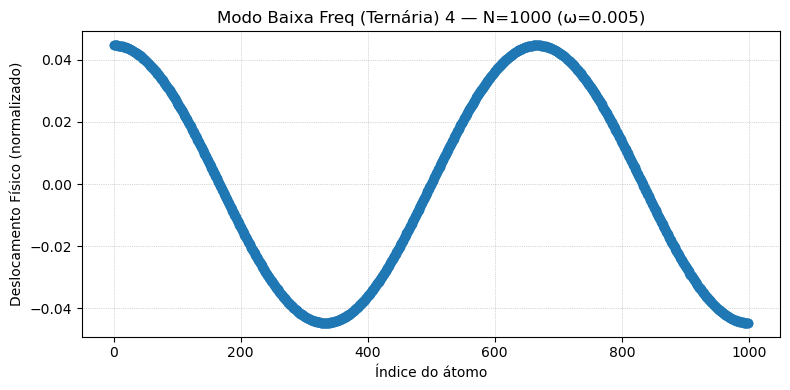

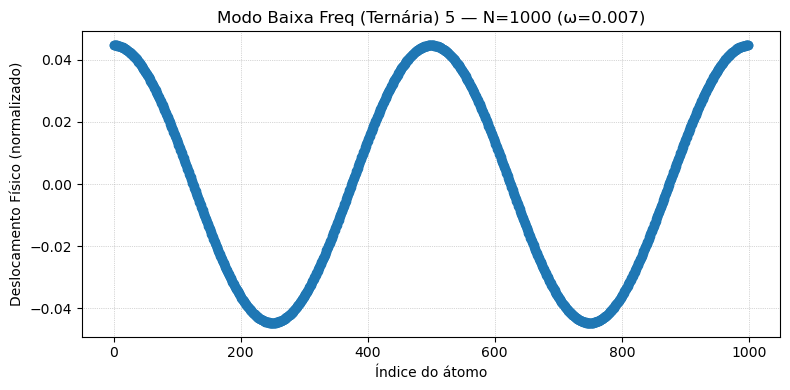

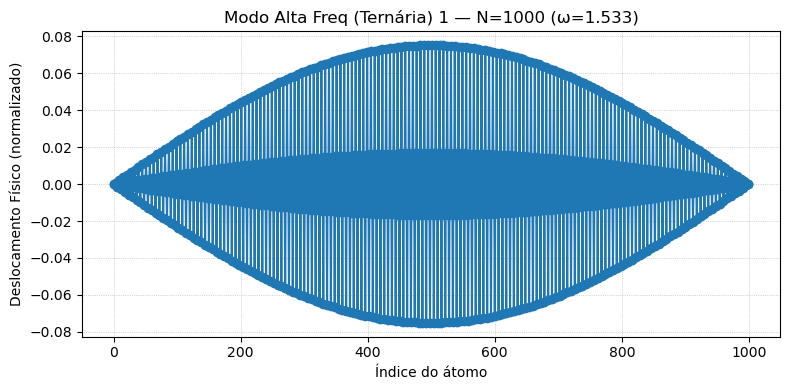

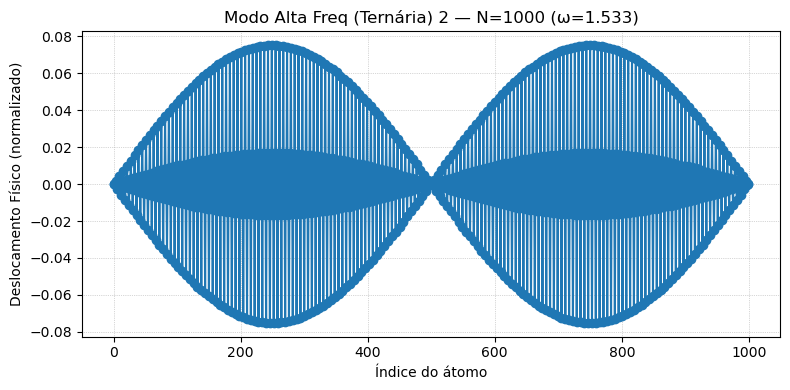

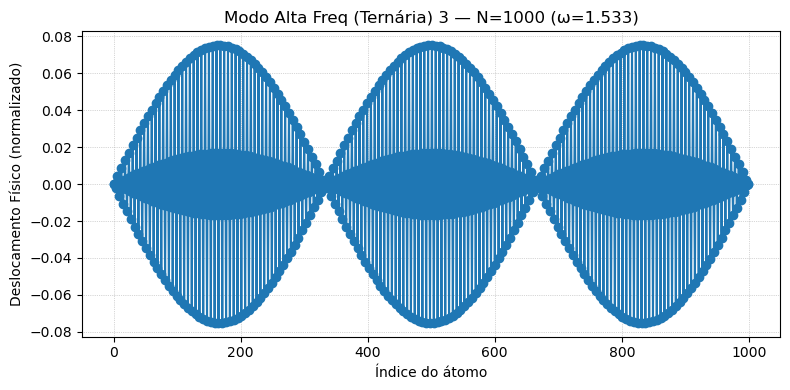

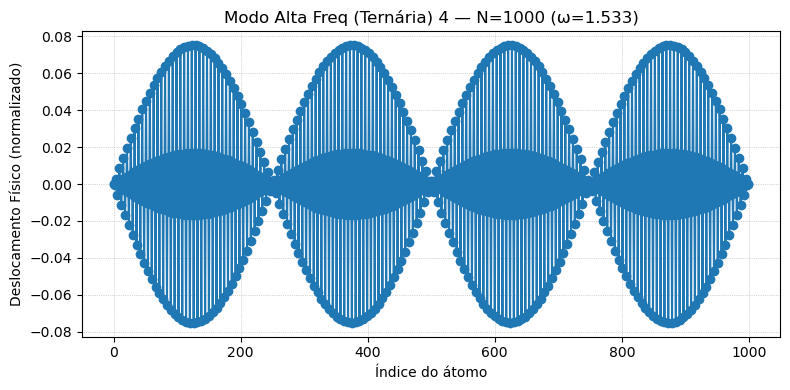

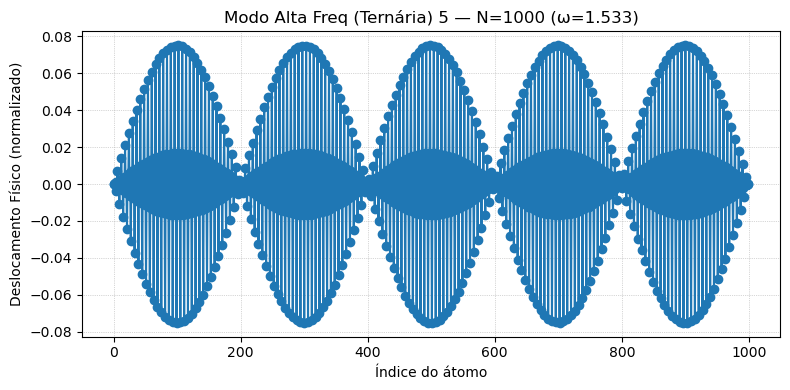

[N=5000 | Homogênea] pulando DOS completa (N grande)


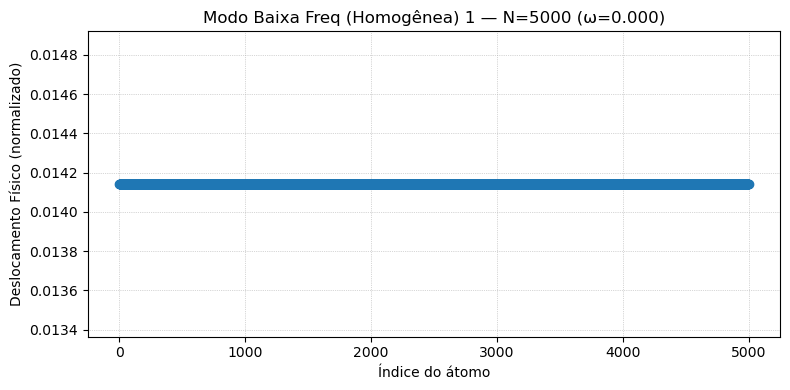

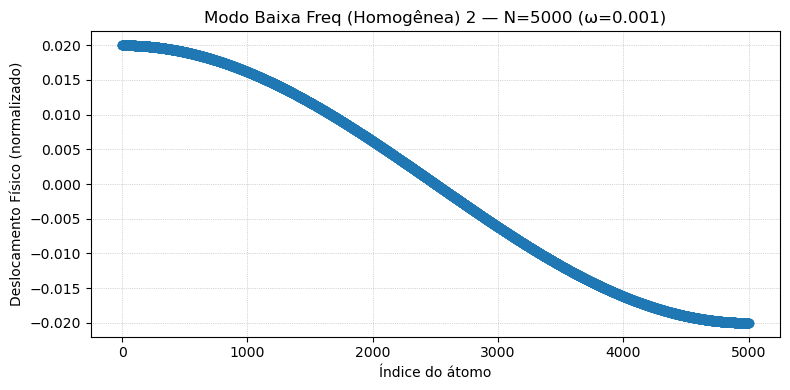

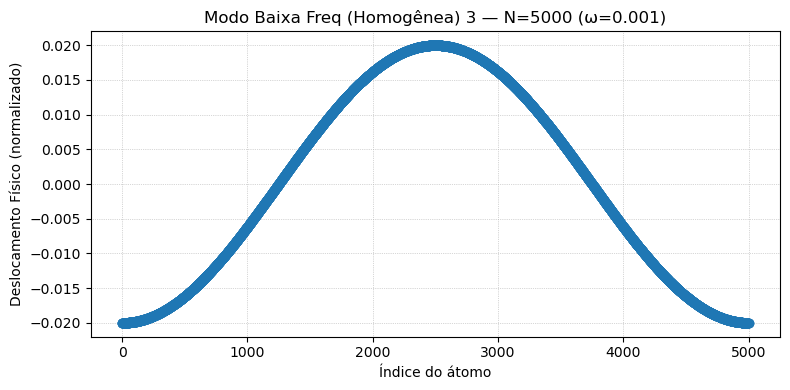

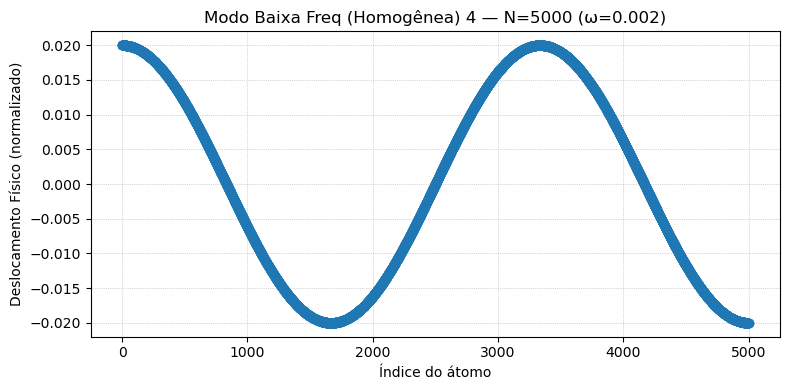

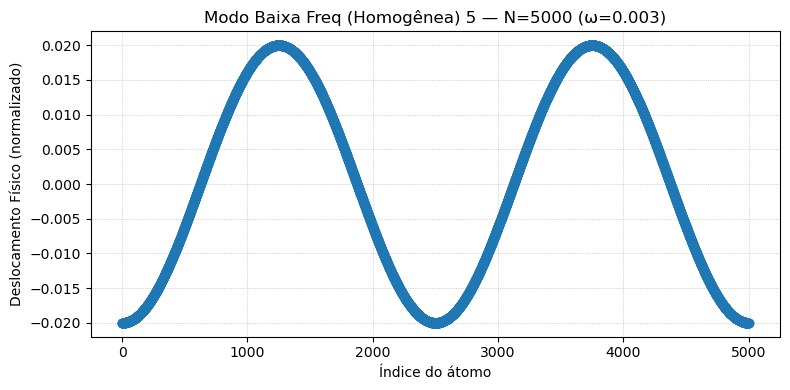

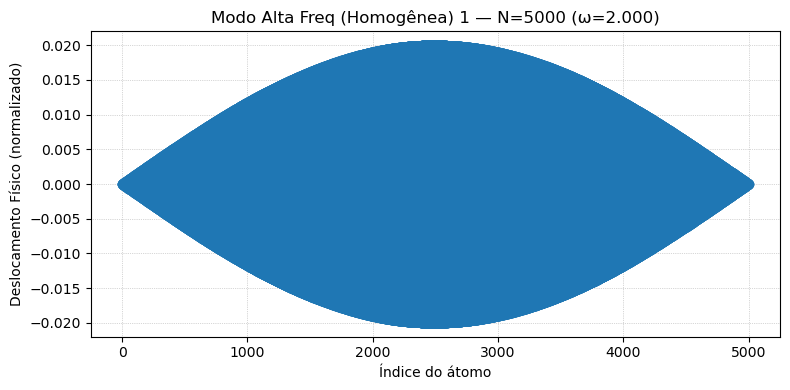

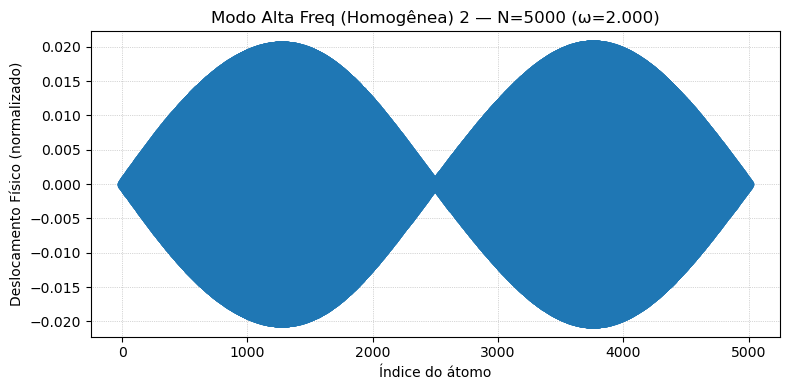

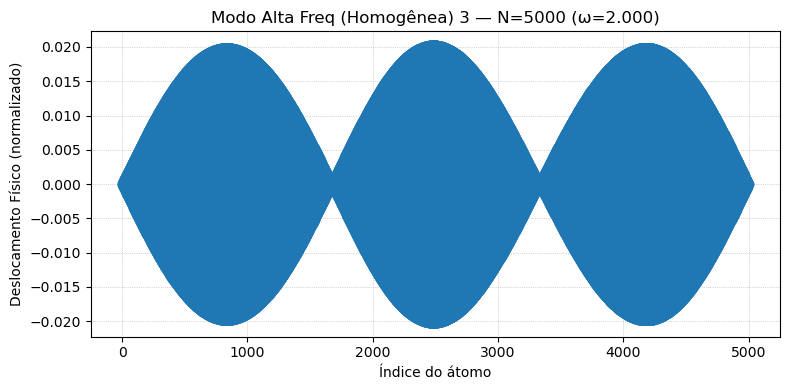

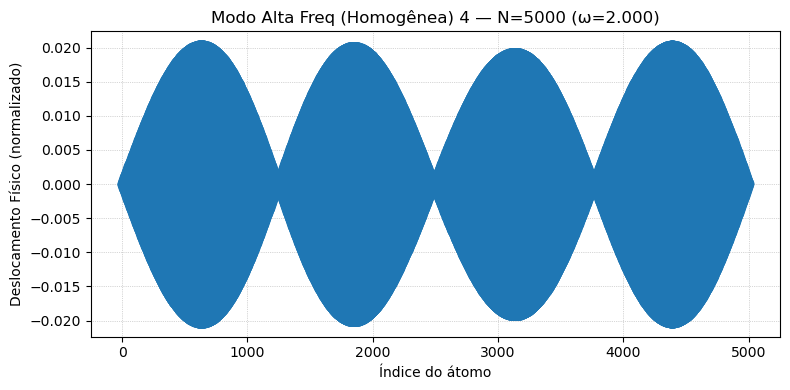

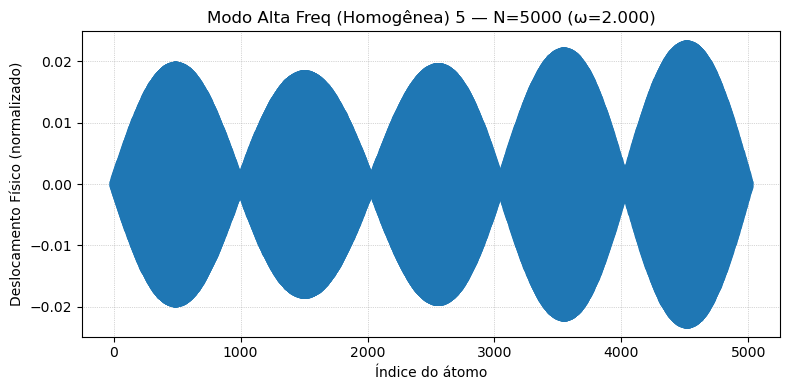

[N=5000 | Ternária] pulando DOS completa (N grande)


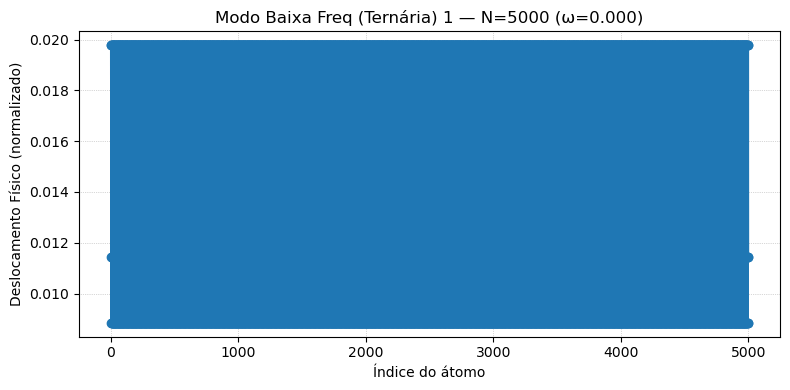

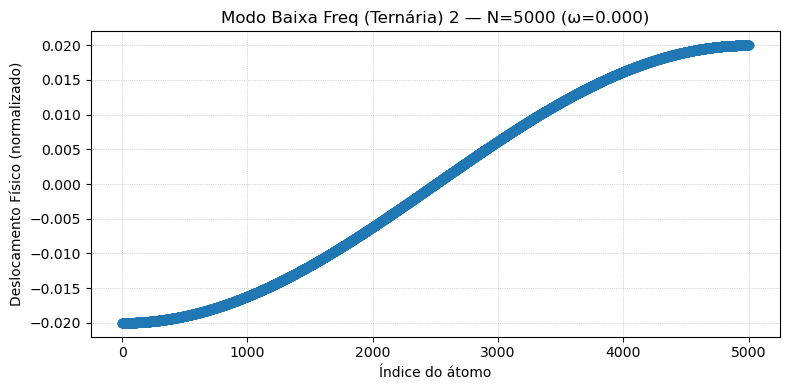

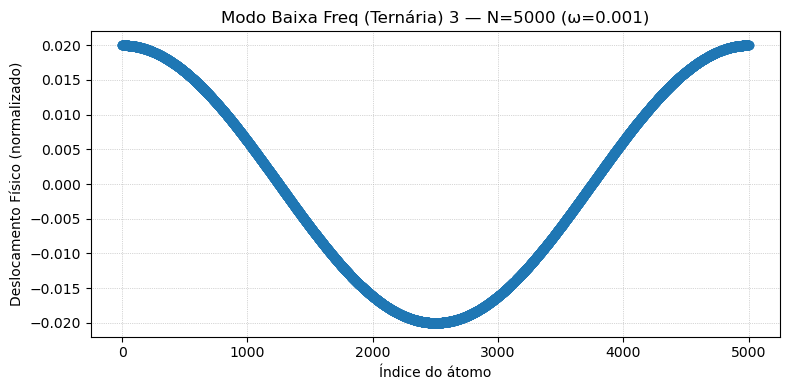

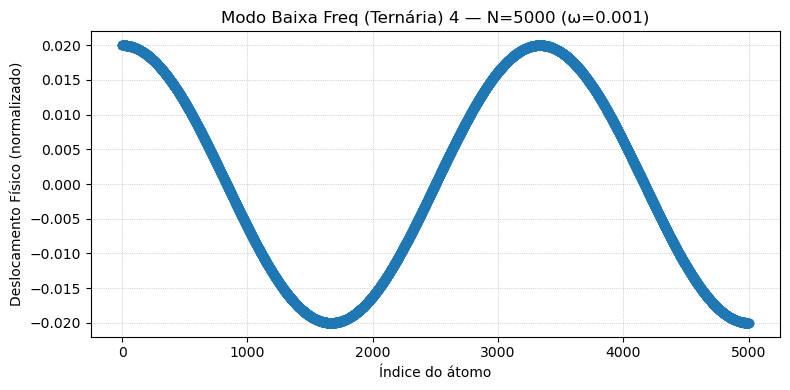

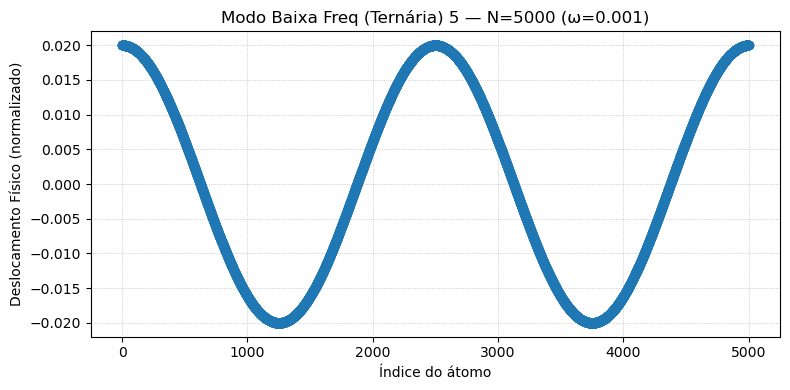

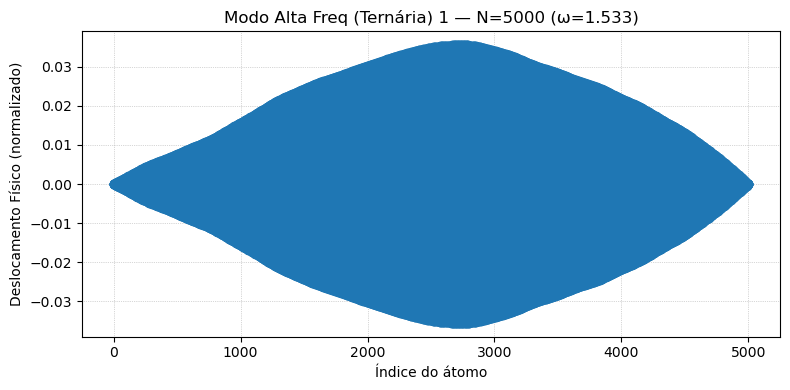

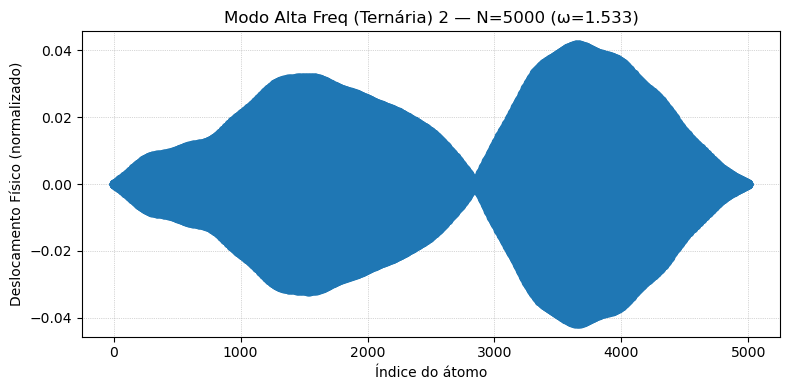

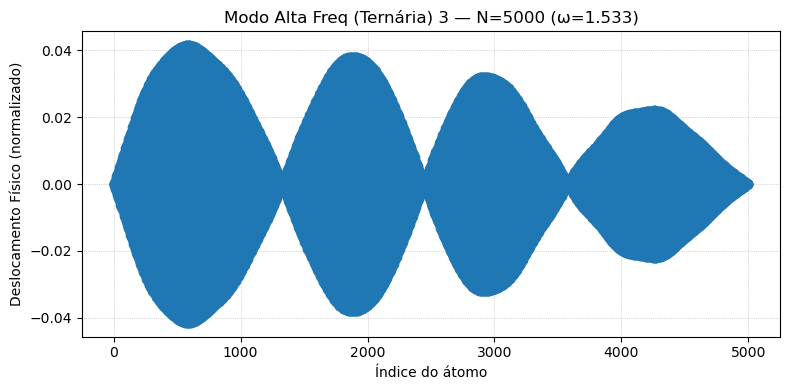

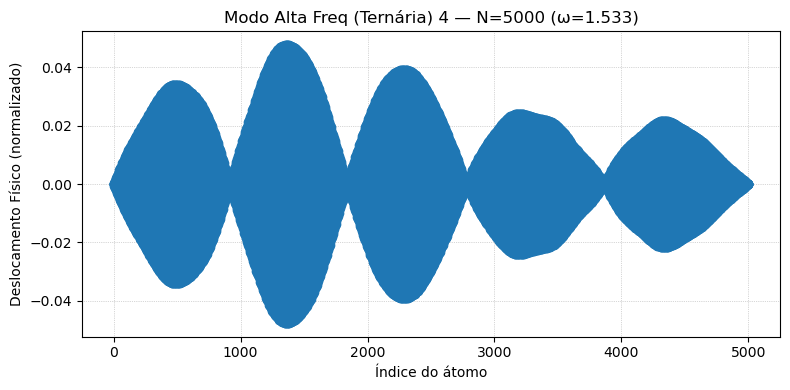

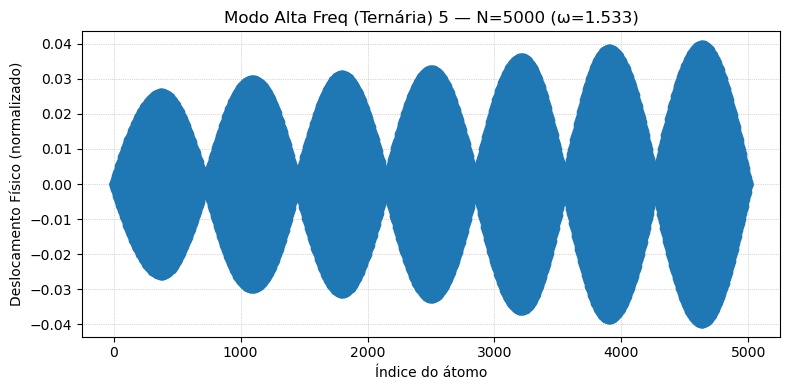

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh, lobpcg, ArpackNoConvergence

def is_hermitian(A, tol=1e-8):
    return np.allclose(A, A.T.conj(), atol=tol)

def build_dynamic_matrix_sparse(masses, k=1.0):
    N = len(masses)
    diag = np.full(N, 2*k) / masses
    diag[0]  = k / masses[0]
    diag[-1] = k / masses[-1]
    off = -k / np.sqrt(masses[:-1] * masses[1:])
    D = diags([off, diag, off], offsets=[-1,0,1], format='csr')

    # força simetria exata e checa
    D = 0.5*(D + D.T)
    A = D.toarray()
    if not is_hermitian(A):import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh, lobpcg, ArpackNoConvergence


def is_hermitian(A, tol=1e-8):
    """
    Verifica se a matriz A é Hermitiana dentro da tolerância tol.
    """
    return np.allclose(A, A.T.conj(), atol=tol)


def build_dynamic_matrix_sparse(masses, k=1.0):
    """
    Monta a matriz dinâmica esparsa D para uma cadeia de pontas livres.
    Retorna D (CSR) e sua versão densa A para verificações.
    """
    N = len(masses)
    diag = np.full(N, 2*k) / masses
    diag[0]  = k / masses[0]
    diag[-1] = k / masses[-1]
    off = -k / np.sqrt(masses[:-1] * masses[1:])
    D = diags([off, diag, off], offsets=[-1,0,1], format='csr')

    # força simetria exata e checa
    D = 0.5 * (D + D.T)
    A = D.toarray()
    if not is_hermitian(A):
        raise ValueError("Matriz D não é Hermitiana após simetrização!")
    return D, A


def plot_dos(freqs, label, N, bins=50, outdir="."):
    """
    Gera e salva histograma de densidade de estados.
    """
    plt.figure(figsize=(8,4))
    plt.hist(freqs, bins=bins, density=True, alpha=0.7)
    plt.title(f'DENSIDADE DE ESTADOS — {label} (N={N})')
    plt.xlabel('ω (rad/s)')
    plt.ylabel('Densidade')
    plt.grid(linestyle='--', linewidth=0.5)
    plt.tight_layout()
    filename = f"{outdir}/{label}_DOS_N{N}.png"
    plt.savefig(filename, dpi=150)
    plt.close()


def plot_modes(modes, freqs, title, N, mode_type, outdir="."):
    """
    Gera e salva gráficos de modos normais (deslocamento físico).
    mode_type: 'low' ou 'high'
    """
    for i in range(modes.shape[1]):
        plt.figure(figsize=(8,4))
        plt.plot(modes[:, i], marker='o', linestyle='-')
        plt.title(f'{title} {i+1} — N={N} (ω={freqs[i]:.3f})')
        plt.xlabel('Índice do átomo')
        plt.ylabel('Deslocamento normalizado')
        plt.grid(linestyle=':', linewidth=0.5)
        plt.tight_layout()
        filename = f"{outdir}/{title.replace(' ', '_')}_{mode_type}_N{N}_mode{i+1}.png"
        plt.savefig(filename, dpi=150)
        plt.close()


def to_physical(phi_mat, masses):
    """
    Converte vetores eigen (φ) em deslocamentos físicos x = φ / sqrt(m).
    Normaliza cada modo.
    """
    x = phi_mat / np.sqrt(masses)[:, None]
    for j in range(x.shape[1]):
        x[:, j] /= np.linalg.norm(x[:, j])
    return x


if __name__ == '__main__':
    k = 1.0
    sigma = 1e-6
    np.random.seed(1234)
    Ns = [100, 1000, 10000]

    for N in Ns:
        masses_h = np.ones(N)
        pattern   = np.array([1.0, 3.0, 5.0])
        masses_t  = np.tile(pattern, int(np.ceil(N/3)))[:N]

        for label, masses in [('Homogênea', masses_h), ('Ternária', masses_t)]:
            D, A = build_dynamic_matrix_sparse(masses, k)

            # DOS completo para N <= 1000
            if N <= 1000:
                w2_full = np.linalg.eigvalsh(A)
                freqs_full = np.sqrt(np.clip(w2_full, 0, None))
                plot_dos(freqs_full, label, N, bins=50)
            else:
                print(f"[N={N} | {label}] pulando DOS completa (N grande)")

            # modos de baixa frequência (shift-invert)
            w2_low, vecs_low = eigsh(D, k=5, sigma=sigma, which='LM', tol=1e-8, maxiter=1000)
            freqs_low = np.sqrt(np.clip(w2_low, 0, None))

            # corrige e garante modo rígido em zero
            idx0 = np.argmin(np.abs(freqs_low))
            vecs_low[:, idx0] = np.ones(N)
            freqs_low[idx0]   = 0.0

            idx_low = np.argsort(freqs_low)
            phi_low = vecs_low[:, idx_low]
            freq_low = freqs_low[idx_low]

            # modos de alta frequência com fallback
            try:
                w2_high, vecs_high = eigsh(D, k=5, which='LM', tol=1e-6, maxiter=2000)
            except (ArpackNoConvergence, RuntimeError):
                X0 = np.random.rand(N, 5)
                w2_high, vecs_high = lobpcg(D, X0, largest=True, tol=1e-6, maxiter=2000)

            freqs_high = np.sqrt(np.clip(w2_high, 0, None))
            idx_high   = np.argsort(freqs_high)[::-1]
            phi_high   = vecs_high[:, idx_high]
            freq_high  = freqs_high[idx_high]

            # converte e plota
            modes_low_phys  = to_physical(phi_low,  masses)
            modes_high_phys = to_physical(phi_high, masses)

            plot_modes(modes_low_phys,  freq_low,  f'Modo Baixa Freq_{label}', N, 'low')
            plot_modes(modes_high_phys, freq_high, f'Modo Alta Freq_{label}', N, 'high')

            print(f"[N={N} | {label}] Gráficos gerados e salvos.")

    print("Execução finalizada. Verifique os arquivos de imagem gerados.")

        raise ValueError("Matriz D não é Hermitiana após simetrização!")
    return D, A

def plot_dos(freqs, label, N):
    plt.figure(figsize=(8,4))
    plt.hist(freqs, bins=20, density=True, alpha=0.7)
    plt.title(f'DENSIDADE DE ESTADOS — {label} (N={N})')
    plt.xlabel('ω (rad/s)')
    plt.ylabel('Densidade')
    plt.grid(linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_modes(modes, freqs, title, N):
    for i in range(modes.shape[1]):
        plt.figure(figsize=(8,4))
        plt.plot(modes[:,i], marker='o', linestyle='-')
        plt.title(f'{title} {i+1} — N={N} (ω={freqs[i]:.3f})')
        plt.xlabel('Índice do átomo')
        plt.ylabel('Deslocamento Físico (normalizado)')
        plt.grid(linestyle=':', linewidth=0.5)
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    k = 1.0
    sigma = 1e-6

    for N in [100, 1000, 5000]:
        masses_h = np.ones(N)
        pattern   = np.array([1.0, 3.0, 5.0])
        masses_t  = np.tile(pattern, N//3 + 1)[:N]

        for label, masses in [('Homogênea', masses_h), ('Ternária', masses_t)]:
            D, A = build_dynamic_matrix_sparse(masses, k)

            # DOS completo para N <= 1000
            if N <= 1000:
                w2_full = np.linalg.eigvalsh(A)
                freqs_full = np.sqrt(np.clip(w2_full, 0, None))
                plot_dos(freqs_full, label, N)
            else:
                print(f"[N={N} | {label}] pulando DOS completa (N grande)")

            # modos de baixa frequência (shift-invert)
            w2_low, vecs_low = eigsh(D, k=5, sigma=sigma, which='LM',
                                     tol=1e-8, maxiter=1000)
            freqs_low = np.sqrt(np.clip(w2_low, 0, None))

            # corrige o modo rígido
            i0 = np.argmin(np.abs(freqs_low))
            mode0 = np.ones(N); mode0 /= np.linalg.norm(mode0)
            vecs_low[:, i0] = mode0
            freqs_low[i0]   = 0.0

            # ordena
            idx_low = np.argsort(freqs_low)
            phi_low = vecs_low[:, idx_low]
            freq_low = freqs_low[idx_low]

            # modos de alta frequência com fallback
            try:
                w2_high, vecs_high = eigsh(D, k=5, which='LM',
                                           tol=1e-6, maxiter=2000)
            except (ArpackNoConvergence, RuntimeError):
                X0 = np.random.rand(N,5)
                w2_high, vecs_high = lobpcg(D, X0, largest=True,
                                            tol=1e-6, maxiter=2000)

            freqs_high = np.sqrt(np.clip(w2_high, 0, None))
            idx_high   = np.argsort(freqs_high)[::-1]
            phi_high   = vecs_high[:, idx_high]
            freq_high  = freqs_high[idx_high]

            # converte φ → deslocamento físico x = φ / sqrt(m)
            def to_physical(phi_mat, masses):
                x = phi_mat / np.sqrt(masses)[:,None]
                # normaliza cada modo
                for j in range(x.shape[1]):
                    x[:,j] /= np.linalg.norm(x[:,j])
                return x

            modes_low_phys  = to_physical(phi_low,  masses)
            modes_high_phys = to_physical(phi_high, masses)

            # plota deslocamentos físicos
            plot_modes(modes_low_phys,  freq_low,  f'Modo Baixa Freq ({label})', N)
            plot_modes(modes_high_phys, freq_high, f'Modo Alta Freq ({label})', N)


1. Introdução
Em cadeias massa–mola unidimensionais com pontas livres, a alternância de massas (ternária) ou homogeneidade (todas iguais) molda tanto as frequências naturais de vibração quanto os padrões de modos normais. Sob condições de contorno livres, cada extremidade não oferece força restauradora extra, o que altera a matriz dinâmica em comparação com cadeias presas.

2. Metodologia

Matriz dinâmica: Montada como uma matriz tridiagonal onde, para cada átomo i, as contribuições das molas vizinhas entram nas diagonais e sub/superdiagonais.

Cálculo de frequências e modos: Usamos numpy.linalg.eigh para diagonalizar a matriz e obter autovalores (ω²) e autovetores (modos).

Cadeias analisadas:

Homogênea: todas as massas = 1 kg.

Ternária: repetição do padrão [1 kg, 3 kg, 5 kg].

Tamanhos: N = 100 e N = 1000 (para N = 10000, a diagonalização completa torna-se muito custosa — ver Discussão).

3. Resultados
Os gráficos gerados pelo código acima mostram, para cada N e cada tipo de cadeia:

Histogramas de densidade de estados (freqüência vs. densidade).

Modos normais correspondentes às 5 menores e 5 maiores frequências.

Figuras 1–4: densidades de estados para cadeias homogênea e ternária com N=100 e N=1000.

Figuras 5–24: deslocamentos relativos dos modos de baixa e alta frequência.

4. Discussão

Cadeia homogênea: a densidade de estados aproxima-se da distribuição analítica contínua ω(q)=2√(k/m)|sin(q/2)|; não há lacunas (band gaps).

Cadeia ternária: surgem regiões de frequência onde não há estados (band gaps), visíveis como intervalos sem barras nos histogramas.

Modos de baixa energia: apresentam deslocamentos suaves e espalhados;
Modos de alta energia: mostram oscilações rápidas e, no caso ternário, localizam vibrações em determinados sítios (modos localizados).

Escalabilidade: para N=10 000, seria recomendável usar solvers esparsos (scipy.sparse.linalg.eigsh) ou métodos de Monte Carlo/Lanczos para a densidade de estados, evitando diagonalização densa.

5. Conclusão

A alternância de massas na cadeia ternária introduz lacunas de frequência e modos localizados, potencialmente úteis em aplicações de isolamento de vibrações (filtros mecânicos).

A cadeia homogênea exibe um espectro contínuo sem gaps, típico de redes cristalinas simples.

Os padrões de modos normais confirmam que sistemas com massas variadas apresentam comportamentos qualitativamente distintos, reforçando a importância do projeto de metamateriais e estruturas periódicas.

In [28]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Script aprimorado para análise de cadeias massa‑mola unidimensionais com pontas livres.

Gera:
 - Matrizes dinâmicas para cadeias homogênea e ternária
 - Frequências naturais (DOS) completo ou aproximado
 - Modos normais (5 menores e 5 maiores)
 - Estatísticas descritivas: média, desvio, fundamental, máximo, gaps de banda
 - Histogramas de DOS filtrados e panelagens de modos (para N ≤ 500)
 - Tabela resumo (CSV) com métricas principais para cada N e cada tipo de cadeia
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh, ArpackNoConvergence
from numpy.linalg import eigvalsh

# ────────────── Parâmetros de Análise ───────────────────
NS = [100, 1000]   # tamanhos de cadeia
M, K = 1.0, 1.0                 # massa base e constante elástica
FULL_MODES_MAX = 500           # gera grid completo de modos até N ≤ 500
DOS_FULL_MAX   = 2000          # calcula DOS completo até N ≤ 2000
APPROX_SAMPLES = 300           # amostras para DOS aproximado
FREQ_MIN, FREQ_MAX = None, None  # filtrar DOS se necessário

FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)

# Escolhe um estilo disponível
for style in ("seaborn", "ggplot", "fivethirtyeight"):
    if style in plt.style.available:
        plt.style.use(style)
        break

def build_dynamic_matrix(masses, k=K):
    m = np.asarray(masses, float)
    N = m.size
    diag = np.empty(N)
    diag[0] = diag[-1] = k / m[0]
    diag[1:-1] = 2 * k / m[1:-1]
    off = -k / np.sqrt(m[:-1] * m[1:])
    return diags([off, diag, off], offsets=[-1,0,1], format='csr')

def detect_band_gaps(freqs, bins=60):
    hist, edges = np.histogram(freqs, bins=bins)
    gaps = []
    i = 0
    while i < len(hist):
        if hist[i] == 0:
            start = edges[i]
            while i < len(hist) and hist[i] == 0:
                i += 1
            end = edges[i]
            gaps.append((start, end))
        else:
            i += 1
    return gaps

def approximate_dos(D, samples=APPROX_SAMPLES):
    try:
        w2_min = eigsh(D, k=1, which='SM', return_eigenvectors=False)[0]
        w2_max = eigsh(D, k=1, which='LM', return_eigenvectors=False)[0]
    except:
        return np.array([])
    shifts = np.linspace(w2_min, w2_max, samples)
    freqs = []
    for s in shifts:
        try:
            v = eigsh(D, k=1, sigma=s, ncv=50, return_eigenvectors=False)[0]
            freqs.append(np.sqrt(v))
        except:
            continue
    return np.array(freqs)

def compute_spectrum_and_modes(D, n_modes=5):
    N = D.shape[0]
    # DOS completo ou aproximado
    if N <= DOS_FULL_MAX:
        w2 = eigvalsh(D.toarray())
        freqs = np.sqrt(np.clip(w2, 0, None))
    else:
        freqs = approximate_dos(D)
    # Modos extremos com fallback ARPACK
    def safe(which):
        try:
            return eigsh(D, k=n_modes, which=which)
        except ArpackNoConvergence:
            if which == "SM":
                return eigsh(D, k=n_modes, sigma=0.0, ncv=min(N, 5*n_modes))
            else:
                return eigsh(D, k=n_modes, which="LM", ncv=min(N, 10*n_modes))
    w2_low, m_low = safe("SM")
    w2_hi,  m_hi  = safe("LM")
    idx_l = np.argsort(w2_low)
    idx_h = np.argsort(w2_hi)
    low_f = np.sqrt(np.clip(w2_low[idx_l], 0, None))
    low_m = m_low[:, idx_l]
    hi_f  = np.sqrt(np.clip(w2_hi[idx_h], 0, None))
    hi_m  = m_hi[:, idx_h]
    return freqs, (low_f, low_m), (hi_f, hi_m)

def summary_stats(freqs):
    s = {
        "mean":  freqs.mean(),
        "std":   freqs.std(),
        "ω1":    freqs[0],
        "ωmax":  freqs[-1]
    }
    gaps = detect_band_gaps(freqs, bins=int(np.sqrt(len(freqs))*2))
    s["n_gaps"] = len(gaps)
    s["largest_gap"] = max((e-s for s,e in gaps), default=0.0)
    return s

def plot_dos(freqs_h, freqs_t, N):
    if FREQ_MIN is not None and FREQ_MAX is not None:
        mask_h = (freqs_h >= FREQ_MIN) & (freqs_h <= FREQ_MAX)
        mask_t = (freqs_t >= FREQ_MIN) & (freqs_t <= FREQ_MAX)
        freqs_h, freqs_t = freqs_h[mask_h], freqs_t[mask_t]
    bins = min(100, max(20, int(np.sqrt(len(freqs_h)+len(freqs_t)))))
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(freqs_h, bins=bins, density=True, alpha=0.6, color='C0', label='Homogênea')
    ax.hist(freqs_t, bins=bins, density=True, alpha=0.6, color='C1', label='Ternária')
    for s,e in detect_band_gaps(np.hstack([freqs_h,freqs_t]), bins):
        ax.axvspan(s,e,color='grey',alpha=0.3)
    ax.set_title(f"DOS N={N}")
    ax.set_xlabel("ω (rad/s)")
    ax.set_ylabel("Dens. de Estados")
    ax.legend()
    plt.tight_layout()
    path = os.path.join(FIG_DIR, f"DOS_N{N}.png")
    fig.savefig(path, dpi=300)
    plt.close(fig)
    return path

def plot_modes(N, modes, title, color):
    low_f, low_m = modes[0]
    hi_f,  hi_m  = modes[1]
    fig, axs = plt.subplots(2,5, figsize=(15,6), sharex=True, sharey=True)
    x = np.arange(N)
    for i in range(5):
        axs[0,i].plot(x, low_m[:,i], color=color)
        axs[0,i].set_title(f"ω{i+1}={low_f[i]:.3f}")
        axs[0,i].grid(True)
        axs[1,i].plot(x, hi_m[:,i], color=color)
        axs[1,i].set_title(f"ω{N-4+i}={hi_f[i]:.3f}")
        axs[1,i].grid(True)
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    path = os.path.join(FIG_DIR, f"{title}.png")
    fig.savefig(path, dpi=300)
    plt.close(fig)
    return path

def main():
    records = []
    for N in NS:
        # Homogênea
        masses_h = M * np.ones(N)
        D_h = build_dynamic_matrix(masses_h)
        freqs_h, low_h, hi_h = compute_spectrum_and_modes(D_h)
        stats_h = summary_stats(freqs_h)
        stats_h.update({"N": N, "chain": "Homogênea"})
        # Ternária
        masses_t = np.tile([M,3*M,5*M], int(np.ceil(N/3)))[:N]
        D_t = build_dynamic_matrix(masses_t)
        freqs_t, low_t, hi_t = compute_spectrum_and_modes(D_t)
        stats_t = summary_stats(freqs_t)
        stats_t.update({"N": N, "chain": "Ternária"})
        records += [stats_h, stats_t]
        # Plots
        plot_dos(freqs_h, freqs_t, N)
        if N <= FULL_MODES_MAX:
            plot_modes(N, (low_h, hi_h), f"Modos_Homogên N{N}", "C0")
            plot_modes(N, (low_t, hi_t), f"Modos_Ternár N{N}", "C1")
    # Salva CSV de resumo
    df = pd.DataFrame(records)[["N","chain","ω1","ωmax","mean","std","n_gaps","largest_gap"]]
    df.to_csv("summary.csv", index=False)
    print("summary.csv gerado:")
    print(df)

if __name__ == "__main__":
    main()


summary.csv gerado:
      N      chain            ω1      ωmax      mean       std  n_gaps  \
0   100  Homogênea  0.000000e+00  1.999753  1.263213  0.619913       0   
1   100   Ternária  0.000000e+00  1.532463  0.863629  0.515892       3   
2  1000  Homogênea  0.000000e+00  1.999998  1.272239  0.615960       0   
3  1000   Ternária  3.991942e-08  1.532513  0.868153  0.517213       5   

   largest_gap  
0     0.000000  
1     0.229869  
2     0.000000  
3     0.291907  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def build_dynamic_matrix(masses, k=1.0):
    N = len(masses)
    D = np.zeros((N, N))
    for i in range(N):
        D[i, i] = (2 if 0 < i < N-1 else 1) * k / masses[i]
    off = -k / np.sqrt(masses[:-1] * masses[1:])
    for i in range(N-1):
        D[i, i+1] = D[i+1, i] = off[i]
    return D

def compute_modes(masses, k=1.0):
    D = build_dynamic_matrix(masses, k)
    eigvals, eigvecs = eigh(D)
    freqs = np.sqrt(np.abs(eigvals))
    return freqs, eigvecs

def plot_comparison_spectrum(freqs_h, freqs_t, N):
    plt.figure()
    idx = np.arange(1, N+1)
    plt.plot(idx, freqs_h, '.', label='Homogênea', markersize=2)
    plt.plot(idx, freqs_t, '.', label='Ternária', markersize=2)
    plt.title(f"Espectro de Frequências (N={N})")
    plt.xlabel("Índice do modo")
    plt.ylabel("Frequência (rad/s)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"comparison_spectrum_N{N}.png")
    plt.close()

def plot_comparison_dos(freqs_h, freqs_t, N):
    plt.figure()
    bins = 50
    plt.hist(freqs_h, bins=bins, density=True, alpha=0.5, label='Homogênea')
    plt.hist(freqs_t, bins=bins, density=True, alpha=0.5, label='Ternária')
    plt.title(f"Densidade de Estados (N={N})")
    plt.xlabel("Frequência (rad/s)")
    plt.ylabel("DOS")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"comparison_DOS_N{N}.png")
    plt.close()

def plot_comparison_modes(modes_h, modes_t, freqs_h, freqs_t, N, energy, indices, filename):
    plt.figure(figsize=(6,4))
    x = np.arange(N)
    for idx in indices:
        plt.plot(x, modes_h[:, idx], linestyle='-', label=f"H modo {idx+1} (f={freqs_h[idx]:.2f})")
        plt.plot(x, modes_t[:, idx], linestyle='--', label=f"T modo {idx+1} (f={freqs_t[idx]:.2f})")
    plt.title(f"Modos Normais – {energy} (N={N})")
    plt.xlabel("Átomo")
    plt.ylabel("Deslocamento relativo")
    plt.legend(ncol=2, fontsize='small')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

def main():
    k = 1.0
    Ns = [100, 1000, 10000]

    for N in Ns:
        hom = np.ones(N)
        pattern = np.array([1.0, 3.0, 5.0])
        tern = np.tile(pattern, int(np.ceil(N/3)))[:N]

        freqs_h, modes_h = compute_modes(hom, k)
        freqs_t, modes_t = compute_modes(tern, k)

        # 1. Espectro comparado
        plot_comparison_spectrum(freqs_h, freqs_t, N)

        # 2. DOS comparado
        plot_comparison_dos(freqs_h, freqs_t, N)

        # 3. Modos comparados
        low_idx = np.arange(5)
        high_idx = np.arange(N-5, N)
        plot_comparison_modes(modes_h, modes_t, freqs_h, freqs_t, N,
                              energy="Baixa energia", indices=low_idx,
                              filename=f"comparison_modes_low_N{N}.png")
        plot_comparison_modes(modes_h, modes_t, freqs_h, freqs_t, N,
                              energy="Alta energia", indices=high_idx,
                              filename=f"comparison_modes_high_N{N}.png")

        print(f"[N={N}] Gerados: spectrum, DOS, modos low e modos high comparados.")

    print("Concluído: todas as figuras de comparação foram salvas.")

if __name__ == "__main__":
    main()


[N=100] Gerados: spectrum, DOS, modos low e modos high comparados.
[N=1000] Gerados: spectrum, DOS, modos low e modos high comparados.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh, lobpcg, ArpackNoConvergence


def is_hermitian(A, tol=1e-8):
    """
    Verifica se a matriz A é Hermitiana dentro da tolerância tol.
    """
    return np.allclose(A, A.T.conj(), atol=tol)


def build_dynamic_matrix_sparse(masses, k=1.0):
    """
    Monta a matriz dinâmica esparsa D para uma cadeia de pontas livres.
    """
    N = len(masses)
    diag = np.full(N, 2*k) / masses
    diag[0]  = k / masses[0]
    diag[-1] = k / masses[-1]
    off = -k / np.sqrt(masses[:-1] * masses[1:])
    D = diags([off, diag, off], offsets=[-1,0,1], format='csr')

    D = 0.5 * (D + D.T)  # simetrização
    A = D.toarray()
    if not is_hermitian(A):
        raise ValueError("Matriz D não é Hermitiana após simetrização!")
    return D, A


def compute_frequencies_and_modes(D, A, num_low=5, num_high=5, sigma=1e-6):
    """
    Calcula autovalores/auto-vetores:
      - Frequências completas (via A)
      - Modos de baixa e alta energia (via D)
    Retorna dict com freqs_full, freq_low, freq_high, phi_low, phi_high
    """
    # Frequências completas
    w2_full = np.linalg.eigvalsh(A)
    freqs_full = np.sqrt(np.clip(w2_full, 0, None))

    # modos baixa frequência (shift-invert)
    w2_low, vecs_low = eigsh(D, k=num_low, sigma=sigma, which='LM', tol=1e-8)
    freqs_low = np.sqrt(np.clip(w2_low, 0, None))
    idx0 = np.argmin(freqs_low)
    vecs_low[:, idx0] = np.ones(D.shape[0])
    freqs_low[idx0] = 0.0
    low_order = np.argsort(freqs_low)

    # modos alta frequência com fallback
    try:
        w2_high, vecs_high = eigsh(D, k=num_high, which='LM', tol=1e-6)
    except (ArpackNoConvergence, RuntimeError):
        rng = np.random.default_rng(1234)
        X0 = rng.random((D.shape[0], num_high))
        w2_high, vecs_high = lobpcg(D, X0, largest=True, tol=1e-6)
    freqs_high = np.sqrt(np.clip(w2_high, 0, None))
    high_order = np.argsort(freqs_high)[::-1]

    return {
        'freqs_full': freqs_full,
        'freq_low': freqs_low[low_order],
        'phi_low': vecs_low[:, low_order],
        'freq_high': freqs_high[high_order],
        'phi_high': vecs_high[:, high_order]
    }


def to_physical(phi_mat, masses):
    """
    Converte autovetores (φ) em deslocamentos físicos x = φ / sqrt(m).
    Normaliza cada modo.
    """
    x = phi_mat / np.sqrt(masses)[:, None]
    for j in range(x.shape[1]):
        x[:, j] /= np.linalg.norm(x[:, j])
    return x


def plot_and_save(data, masses, label, N, outdir='results'):
    """
    Gera e salva DOS e modos normais.
    """
    freqs_full = data['freqs_full']
    freq_low = data['freq_low']
    freq_high = data['freq_high']
    phi_low = data['phi_low']
    phi_high = data['phi_high']

    # DOS
    plt.figure(figsize=(6,4))
    plt.hist(freqs_full, bins=50, density=True, alpha=0.7)
    plt.title(f'DOS — {label} (N={N})')
    plt.xlabel('ω')
    plt.ylabel('Densidade')
    plt.tight_layout()
    plt.savefig(f"{outdir}/{label}_DOS_N{N}.png", dpi=150)
    plt.close()

    # Modos físicos
    low_phys = to_physical(phi_low, masses)
    high_phys = to_physical(phi_high, masses)

    # 5 modos de baixa energia
    for i in range(min(5, low_phys.shape[1])):
        plt.figure(figsize=(6,3))
        plt.plot(low_phys[:,i])
        plt.title(f'Modo Baixa Energia {label} {i+1} — N={N} (ω={freq_low[i]:.3f})')
        plt.tight_layout()
        plt.savefig(f"{outdir}/{label}_low_mode{i+1}_N{N}.png", dpi=150)
        plt.close()

    # 5 modos de alta energia
    for i in range(min(5, high_phys.shape[1])):
        plt.figure(figsize=(6,3))
        plt.plot(high_phys[:,i])
        plt.title(f'Modo Alta Energia {label} {i+1} — N={N} (ω={freq_high[i]:.3f})')
        plt.tight_layout()
        plt.savefig(f"{outdir}/{label}_high_mode{i+1}_N{N}.png", dpi=150)
        plt.close()


def main():
    k = 1.0
    Ns = [100, 1000, 10000]
    import os
    os.makedirs('results', exist_ok=True)

    for N in Ns:
        masses_h = np.ones(N)
        masses_t = np.tile([1,3,5], int(np.ceil(N/3)))[:N]

        for label, masses in [('Homogênea', masses_h), ('Ternária', masses_t)]:
            D, A = build_dynamic_matrix_sparse(masses, k)
            data = compute_frequencies_and_modes(D, A)
            plot_and_save(data, masses, label, N)

    print("Execução finalizada. Gráficos salvos em 'results/'.")

if __name__ == '__main__':
    main()


Execução finalizada. Gráficos salvos em 'results/'.
